### Library

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

### Pre-Processing Data

In [ ]:
df = pd.read_csv("D:/Kuliah/SEM 7/Datmin/Final Project/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Duplicated

In [ ]:
df.duplicated().sum()

0

tidak ada duplikasi pada data

In [ ]:
df = df.drop(['id'], axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Missing Value

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# Mengubah nilai pada kolom hypertension, heart_disease, dan stroke
binary_columns = df.select_dtypes(include=['int64']).columns
mapping = {0: 'No', 1: 'Yes'}

for col in binary_columns:
    df[col] = df[col].map(mapping)

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
print("\nKategori unik di setiap kolom kategorik:")
for col in categorical_cols:
    print(f"Variabel {col}:")
    print(df[col].unique())


Kategori unik di setiap kolom kategorik:
Variabel gender:
['Male' 'Female' 'Other']
Variabel hypertension:
['No' 'Yes']
Variabel heart_disease:
['Yes' 'No']
Variabel ever_married:
['Yes' 'No']
Variabel work_type:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Variabel Residence_type:
['Urban' 'Rural']
Variabel smoking_status:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Variabel stroke:
['Yes' 'No']


ada missing value di variabel gender dan smoking status

In [ ]:
df['gender'] = df['gender'].replace('Other', np.nan)
df['smoking_status'] = df['smoking_status'].replace('Unknown', np.nan)

In [ ]:
df.isnull().sum()

gender                  1
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
df.isnull().mean()*100

gender                0.019569
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   3.933464
smoking_status       30.215264
stroke                0.000000
dtype: float64

karena missing value gender dan bmi masih dibawah 5% maka bisa dilakukan drop missing value

In [ ]:
df = df.dropna(subset=['gender','bmi'])

In [ ]:
len(df)

4908

In [ ]:
df.isnull().mean()*100

gender                0.000000
age                   0.000000
hypertension          0.000000
heart_disease         0.000000
ever_married          0.000000
work_type             0.000000
Residence_type        0.000000
avg_glucose_level     0.000000
bmi                   0.000000
smoking_status       30.215974
stroke                0.000000
dtype: float64

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,No,No,No,children,Rural,103.08,18.6,NaN,No
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [ ]:
# Menggunakan SimpleImputer dengan strategi 'most_frequent' untuk mengisi missing value pada smoking_status
imputer = SimpleImputer(strategy='most_frequent')  # Modus untuk kategori
df['smoking_status'] = imputer.fit_transform(df[['smoking_status']]).ravel()

In [ ]:
df['smoking_status'].value_counts()

smoking_status
never smoked       3335
formerly smoked     836
smokes              737
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
# Simpan DataFrame sebagai file CSV
df.to_csv("dataframe_output.csv", index=False)

#### Outlier

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   object 
 3   heart_disease      4908 non-null   object 
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   object 
dtypes: float64(3), object(8)
memory usage: 460.1+ KB


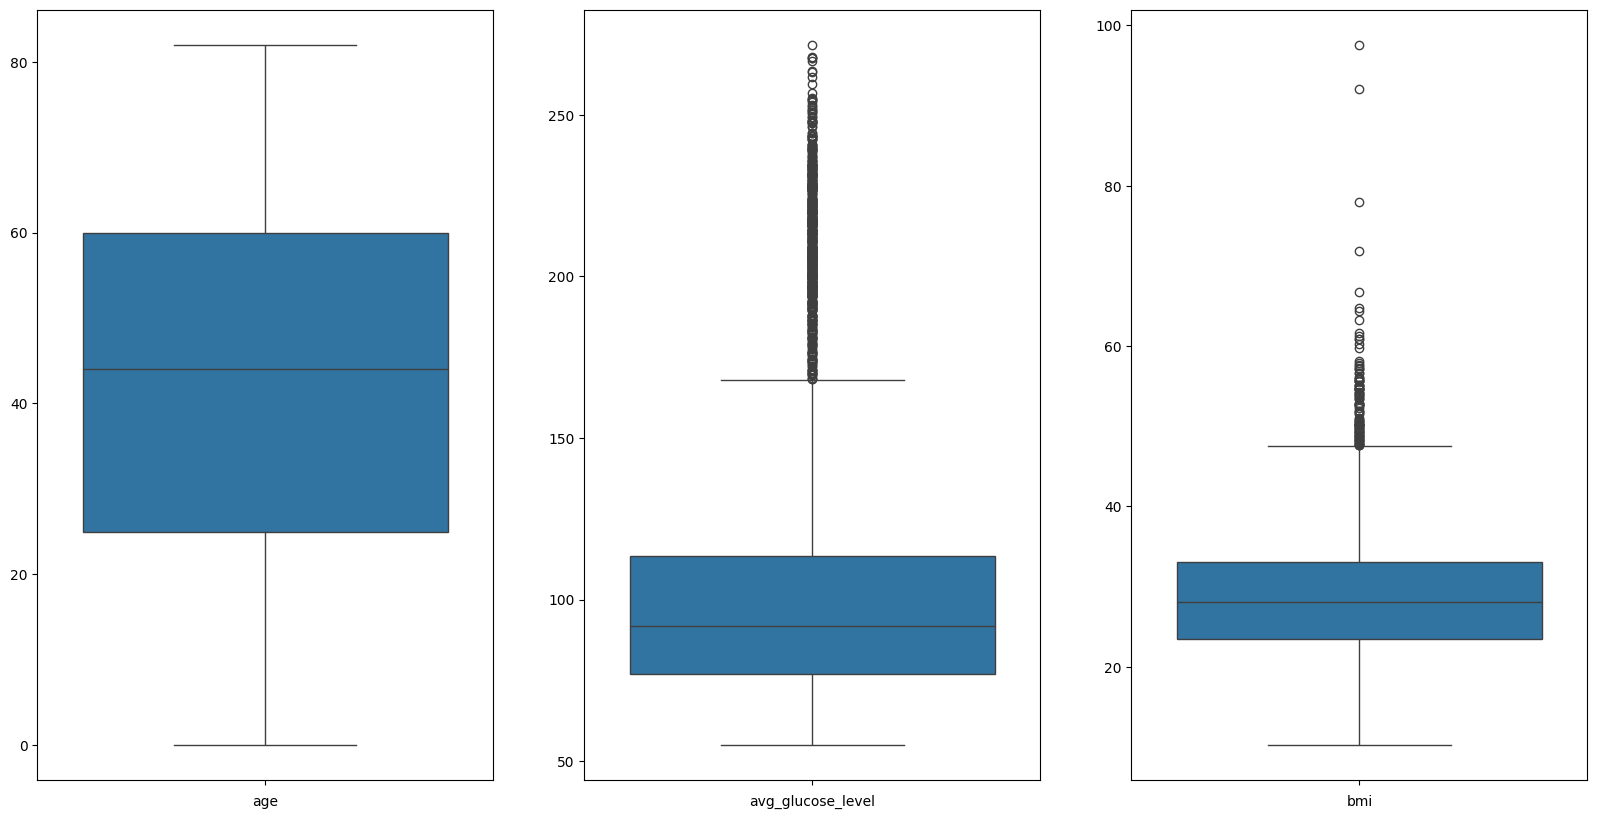

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
ig, axes = plt.subplots(1, 3, figsize=(20, 10))
for idx, col in enumerate(numerical_columns):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')
plt.show()

In [ ]:
# Fungsi untuk mendeteksi outlier menggunakan IQR
def iqr_outliers(df):
    outlier_count = {}
    outlier_percen = {}
    outlier_locations = {}

    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Menentukan outlier
        is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))

        # Menyimpan hasil per kolom
        outlier_count[col] = is_outlier.sum()
        outlier_percen[col] = is_outlier.mean() * 100
        outlier_locations[col] = df[is_outlier].index.tolist()

    return outlier_count, outlier_locations, outlier_percen

# Menerapkan fungsi iqr_outliers pada kolom numerik
iqr_outlier_count, iqr_outlier_locations, iqr_outlier_percen = iqr_outliers(numerical_columns)

# Menampilkan hasil
print("Number of outliers per column (IQR method):")
for col, count in iqr_outlier_count.items():
    print(f"{col}: {count}")

print("\nPercentage of outliers per column (IQR method):")
for col, percent in iqr_outlier_percen.items():
    print(f"{col}: {percent:.2f}%")

print("\nOutlier locations per column (IQR method):")
for col, locations in iqr_outlier_locations.items():
    print(f"{col}: {locations}")

Number of outliers per column (IQR method):
age: 0
avg_glucose_level: 569
bmi: 110

Percentage of outliers per column (IQR method):
age: 0.00%
avg_glucose_level: 11.59%
bmi: 2.24%

Outlier locations per column (IQR method):
age: []
avg_glucose_level: [0, 3, 4, 5, 14, 16, 17, 20, 21, 22, 23, 28, 30, 32, 33, 36, 44, 45, 55, 58, 59, 60, 66, 71, 73, 76, 90, 95, 97, 101, 102, 107, 113, 115, 122, 123, 128, 130, 132, 134, 135, 137, 138, 139, 144, 149, 151, 155, 157, 158, 163, 175, 179, 187, 190, 193, 195, 196, 201, 212, 215, 217, 219, 220, 222, 225, 226, 233, 234, 235, 241, 242, 243, 254, 256, 258, 272, 277, 278, 293, 298, 303, 307, 314, 318, 325, 326, 330, 331, 332, 337, 343, 350, 355, 365, 386, 396, 399, 411, 417, 426, 429, 433, 436, 444, 456, 466, 467, 468, 492, 515, 544, 549, 551, 552, 559, 563, 570, 576, 581, 583, 585, 595, 598, 599, 610, 616, 620, 642, 706, 708, 719, 744, 746, 755, 762, 770, 785, 816, 846, 848, 851, 880, 887, 894, 923, 929, 930, 946, 948, 970, 971, 1011, 1059, 1061, 106

In [ ]:
# def handle_outliers(data):
#     for column in data._get_numeric_data().columns:
#         Q1 = np.percentile(data[column], 25)
#         Q3 = np.percentile(data[column], 75)
#         IQR = Q3 - Q1
#         lower_bound = Q1 - (1.5 * IQR)
#         upper_bound = Q3 + (1.5 * IQR)

#         data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
#         data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# handle_outliers(df)

# df.head()

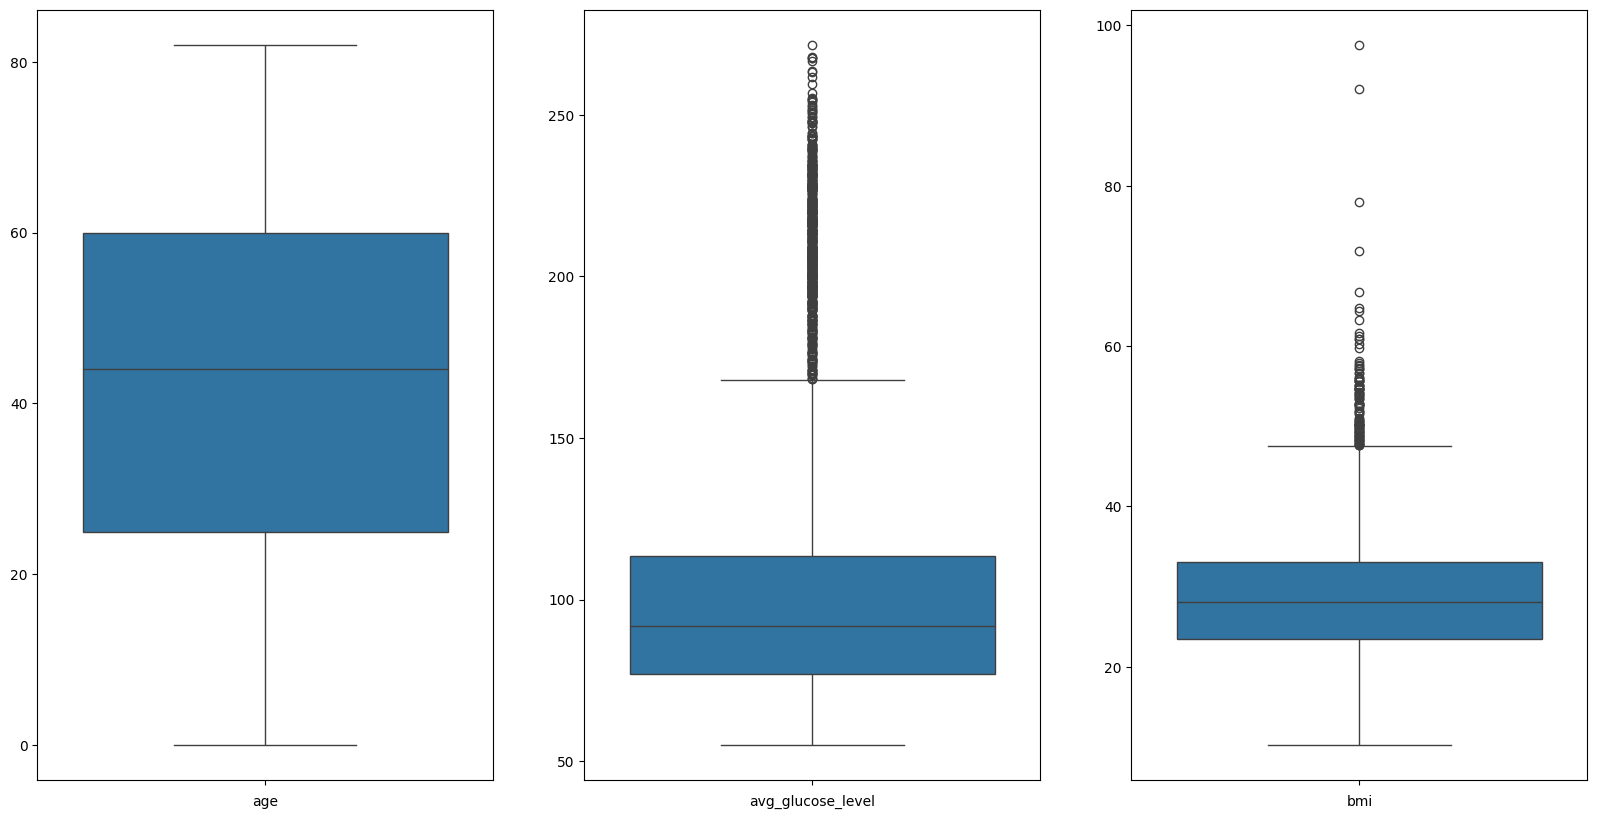

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
ig, axes = plt.subplots(1, 3, figsize=(20, 10))
for idx, col in enumerate(numerical_columns):
    plt.subplot(1, 3, idx + 1)
    sns.boxplot(y=df[col])
    plt.xlabel(col)
    plt.ylabel('')
plt.show()

### Selesai Preprocessing

In [ ]:
df = df.rename(columns={
    'gender' : 'Gender',
    'age' : 'Age',
    'hypertension' : 'Hypertension',
    'heart_disease' : 'Heart Disease',
    'ever_married' : 'Ever Married',
    'work_type' : 'Work Type',
    'Residence_type' : 'Residence Type',
    'avg_glucose_level' : 'Average Glucose Level',
    'bmi' : 'BMI',
    'smoking_status' : 'Smoking Status',
    'stroke' : 'Stroke'
})

df

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes
5,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,Yes
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,No,No,No,children,Rural,103.08,18.6,never smoked,No
5106,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.0,never smoked,No
5107,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.6,never smoked,No
5108,Male,51.0,No,No,Yes,Private,Rural,166.29,25.6,formerly smoked,No


In [ ]:
df_dropped = df.drop('Stroke', axis=1)
numerical_cols = df_dropped.select_dtypes(include=['number']).columns
categorical_cols = df_dropped.select_dtypes(include=['object']).columns

print("Variabel Numerik:")
print(numerical_cols)

print("\nVariabel Kategorik:")
categorical_cols

Variabel Numerik:
Index(['Age', 'Average Glucose Level', 'BMI'], dtype='object')

Variabel Kategorik:


Index(['Gender', 'Hypertension', 'Heart Disease', 'Ever Married', 'Work Type',
       'Residence Type', 'Smoking Status'],
      dtype='object')

In [ ]:
# Menghitung modus untuk variabel kategorik berdasarkan grup Stroke
categorical_mode = df[categorical_cols].join(df['Stroke']).groupby('Stroke').agg(lambda x: x.mode()[0])

# Menghitung mean untuk variabel numerik berdasarkan grup Stroke
numerical_mean = df[numerical_cols].join(df['Stroke']).groupby('Stroke').mean()

print("Modus untuk Variabel Kategorik:")
print(categorical_mode)

print("\nMean untuk Variabel Numerik:")
print(numerical_mean)


Modus untuk Variabel Kategorik:
        Gender Hypertension Heart Disease Ever Married Work Type  \
Stroke                                                             
No      Female           No            No          Yes   Private   
Yes     Female           No            No          Yes   Private   

       Residence Type Smoking Status  
Stroke                                
No              Urban   never smoked  
Yes             Urban   never smoked  

Mean untuk Variabel Numerik:
              Age  Average Glucose Level        BMI
Stroke                                             
No      41.763805             103.995367  28.824431
Yes     67.712919             134.571388  30.471292


In [ ]:
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include=['object']).columns

for col in object_columns:
    df[col] = label_encoder.fit_transform(df[col])

df

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status,Stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,1,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,1,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,1,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,0,0


# Feature Selection

In [ ]:
# Menampilkan distribusi kelas target (Stroke)
class_distribution = df['Stroke'].value_counts()
print(class_distribution)

# Menampilkan proporsi tiap kelas
class_proportions = df['Stroke'].value_counts(normalize=True)
print(class_proportions)

Stroke
0    4699
1     209
Name: count, dtype: int64
Stroke
0    0.957416
1    0.042584
Name: proportion, dtype: float64


karena data tidak balance, maka perlu dilakukan resample

In [ ]:
X = df.drop(columns='Stroke')
y = df['Stroke']

In [ ]:
X

,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Average Glucose Level,BMI,Smoking Status
0,1,67.0,0,1,1,2,1,228.69,36.6,0
2,1,80.0,0,1,1,2,0,105.92,32.5,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2
4,0,79.0,1,0,1,3,0,174.12,24.0,1
5,1,81.0,0,0,1,2,1,186.21,29.0,0
...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,0,4,0,103.08,18.6,1
5106,0,81.0,0,0,1,3,1,125.20,40.0,1
5107,0,35.0,0,0,1,3,0,82.99,30.6,1
5108,1,51.0,0,0,1,2,0,166.29,25.6,0


In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

X_resampled, y_resampled = oversampler.fit_resample(X, y)

print("Original dataset shape:", X.shape, y.shape)
print("Resampled dataset shape:", X_resampled.shape, y_resampled.shape)
X = X_resampled
y = y_resampled

Original dataset shape: (4908, 10) (4908,)
Resampled dataset shape: (9398, 10) (9398,)


In [ ]:
# Menampilkan distribusi kelas target (Stroke)
class_distribution = y.value_counts()
print(class_distribution)

# Menampilkan proporsi tiap kelas
class_proportions = y.value_counts(normalize=True)
print(class_proportions)

Stroke
1    4699
0    4699
Name: count, dtype: int64
Stroke
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2
##ANOVA (Input : Numerik, Output : Kategorik)
#Misalkan akan dipilih variabel numerik yang mempengaruhi Loan_Status
Xnum = X.loc[:,numerical_cols]
y = y
#Feature Selection ANOVA
fsanova = SelectKBest(score_func=f_classif,k=3)
fit=fsanova.fit(Xnum,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xnum.columns) #kolom dataframe

#Hasil Feature Selection ANOVA
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Selected_columns','Score_ANOVA']
#print best fearures
print(featureScores.nlargest(3,'Score_ANOVA'))

        Selected_columns  Score_ANOVA
0                    Age  4963.377625
1  Average Glucose Level   847.246186
2                    BMI   138.429764


In [ ]:
##Chi-Square (Input : Kategorik, Output : Kategorik)
#Misalkan akan dipilih variabel kategorik yang mempengaruhi Loan_Status
Xcat = X.loc[:,categorical_cols]
Xd = pd.get_dummies(Xcat) #perlu didummykan
yd = pd.get_dummies(y) #perlu didummykan

#Feature Selection Chi2
fschi = SelectKBest(score_func=chi2,k=3) #select 3 kategori best
fit=fschi.fit(Xd,yd)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(Xd.columns)

#Hasil Feature Selection Chi2
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Selected_columns','Score_chi2']

#print best features
print(featureScores.nlargest(10,'Score_chi2'))

  Selected_columns  Score_chi2
1     Hypertension  513.918166
2    Heart Disease  434.397810
3     Ever Married  198.093322
4        Work Type   38.349523
6   Smoking Status    9.139218
0           Gender    6.315513
5   Residence Type    3.560278


### Importance Feature

In [ ]:
selected_features=['Age', 'Average Glucose Level', 'BMI', 'Hypertension', 'Heart Disease']

X = X[selected_features]
df = pd.DataFrame(X, columns=selected_features)
df['Stroke'] = y
df

,Age,Average Glucose Level,BMI,Hypertension,Heart Disease,Stroke
0,67.0,228.69,36.6,0,1,1
1,80.0,105.92,32.5,0,1,1
2,49.0,171.23,34.4,0,0,1
3,79.0,174.12,24.0,1,0,1
4,81.0,186.21,29.0,0,0,1
...,...,...,...,...,...,...
9393,68.0,247.51,40.5,1,1,1
9394,55.0,210.40,40.0,1,1,1
9395,51.0,88.20,28.4,1,0,1
9396,80.0,259.63,31.7,0,0,1


# Classification

In [ ]:
import scipy.stats as stats
# Menyimpan hasil
results_ks = {}

# Mengecek normalitas setiap kolom menggunakan uji KS
for column in X.columns:
    # Menghitung uji Kolmogorov-Smirnov
    stat, p_value = stats.kstest(X[column], 'norm', args=(X[column].mean(), X[column].std()))
    results_ks[column] = {"Statistic": stat, "p-value": p_value}

# Mengonversi hasil ke dalam DataFrame
results_ks_df = pd.DataFrame(results_ks).T  # Transpose untuk menampilkan kolom sebagai baris
results_ks_df.columns = ["Statistic", "p-value"]

# Menampilkan hasil dengan format yang rapi
print(results_ks_df)

                       Statistic        p-value
Age                     0.110327  4.369240e-100
Average Glucose Level   0.197341  3.468341e-321
BMI                     0.067105   3.071666e-37
Hypertension            0.498836   0.000000e+00
Heart Disease           0.525197   0.000000e+00


karena data tidak berdistribusi normal, maka scaler yang digunakan adalah minmax scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, roc_auc_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    return accuracy, sensitivity, specificity, roc_auc, fpr, tpr

		$$$ Extreme Gradient Boosting $$$



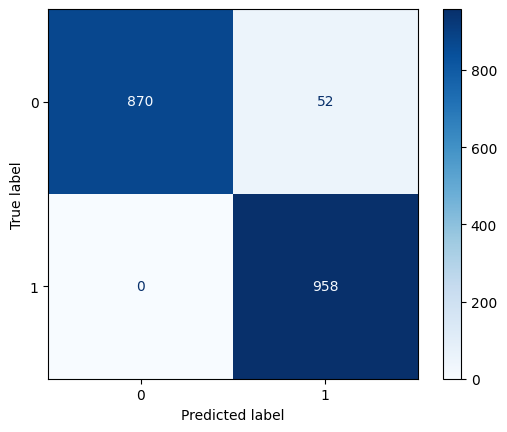


Accuracy: 0.9723404255319149
Sensitivity: 1.0
Specificity: 0.9436008676789588
ROC AUC for: 0.9962220189385876


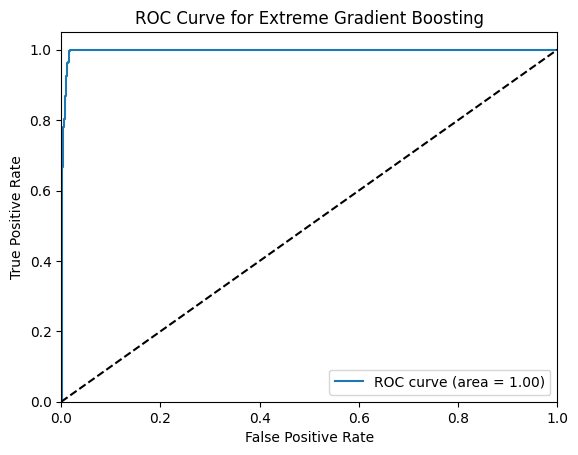



		$$$ Logistic Regression $$$



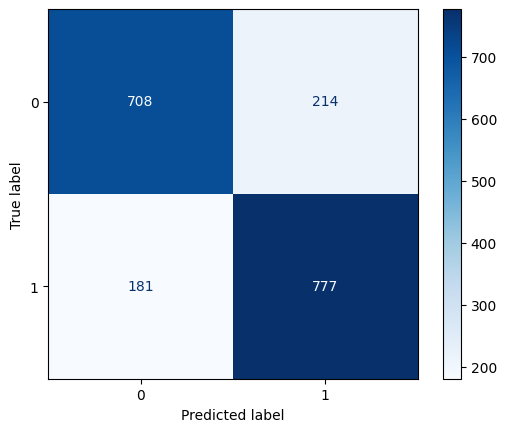


Accuracy: 0.7898936170212766
Sensitivity: 0.8110647181628392
Specificity: 0.7678958785249458
ROC AUC for: 0.85967126922955


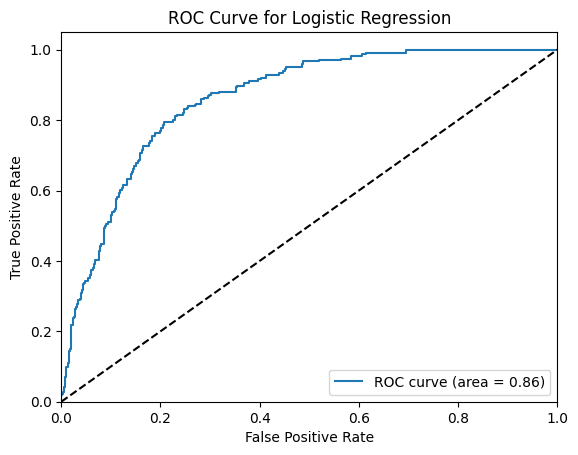



		$$$ Random Forest Classifier $$$



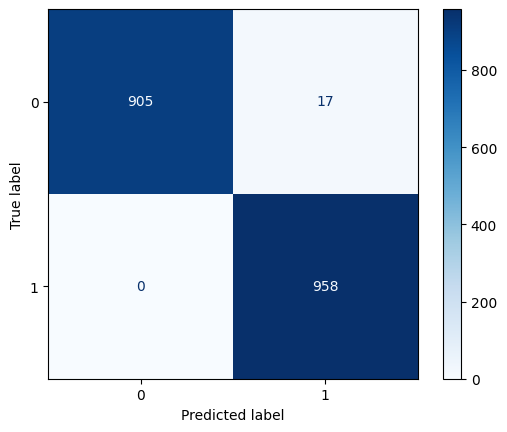


Accuracy: 0.9909574468085106
Sensitivity: 1.0
Specificity: 0.9815618221258134
ROC AUC for: 1.0


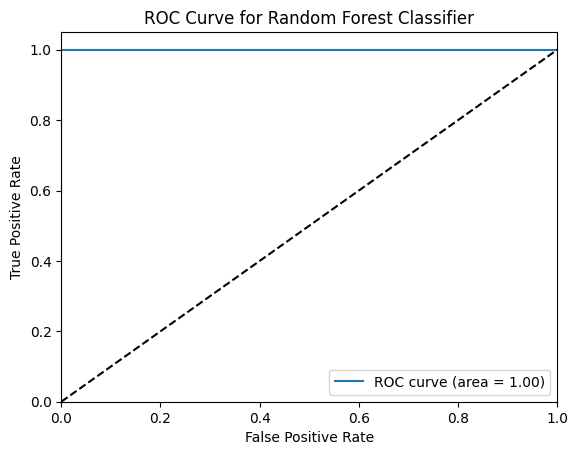



		$$$ Decision Tree Classifier $$$



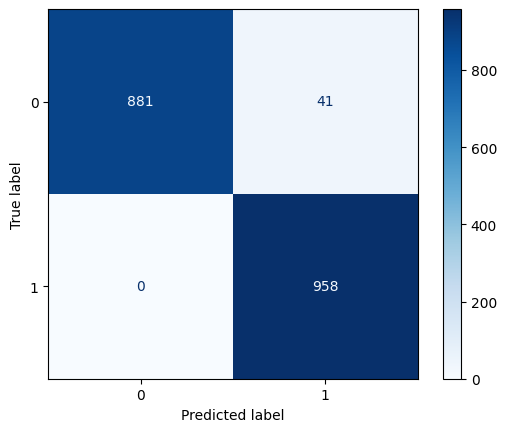


Accuracy: 0.9781914893617021
Sensitivity: 1.0
Specificity: 0.955531453362256
ROC AUC for: 0.977765726681128


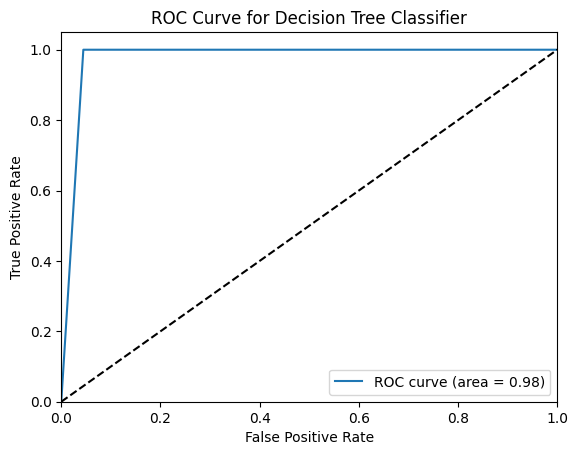

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Extreme Gradient Boosting': XGBClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'Decision Tree Classifier': DecisionTreeClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(X_train, y_train)

    acc, sens, spec, roc_auc, fpr, tpr = evaluate_model(model, X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_tr = model.predict(X_train)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)

    # Confusion Matrix
    print(f"\t\t$$$ {name} $$$\n")
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
    print(f"\nAccuracy: {acc}")
    print(f"Sensitivity: {sens}")
    print(f"Specificity: {spec}")
    print(f"ROC AUC for: {roc_auc}")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    print("\n")

# Evaluation Model

## Repeated Holdout

In [ ]:
# Repeated Holdout
print("\nRepeated Holdout:")
for model_name, model in models.items():
    accuracies, sensitivities, specificities, roc_aucs = [], [], [], []
    for i in range(10):  # Repeat the holdout process 10 times
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
        model.fit(X_train, y_train)
        acc, sens, spec, roc_auc, fpr, tpr = evaluate_model(model, X_test, y_test)
        accuracies.append(acc)
        sensitivities.append(sens)
        specificities.append(spec)
        roc_aucs.append(roc_auc)
    print(f"\nAverage accuracy for {model_name} over 10 repetitions: {np.mean(accuracies)}")
    print(f"Average sensitivity for {model_name} over 10 repetitions: {np.mean(sensitivities)}")
    print(f"Average specificity for {model_name} over 10 repetitions: {np.mean(specificities)}")
    print(f"Average ROC AUC for {model_name} over 10 repetitions: {np.mean(roc_aucs)}")


Repeated Holdout:

Average accuracy for Extreme Gradient Boosting over 10 repetitions: 0.973244680851064
Average sensitivity for Extreme Gradient Boosting over 10 repetitions: 1.0
Average specificity for Extreme Gradient Boosting over 10 repetitions: 0.9468188657520678
Average ROC AUC for Extreme Gradient Boosting over 10 repetitions: 0.9973869217283944

Average accuracy for Logistic Regression over 10 repetitions: 0.7750531914893617
Average sensitivity for Logistic Regression over 10 repetitions: 0.8095806975341805
Average specificity for Logistic Regression over 10 repetitions: 0.7408640548038042
Average ROC AUC for Logistic Regression over 10 repetitions: 0.8547833312034647

Average accuracy for Random Forest Classifier over 10 repetitions: 0.9883510638297872
Average sensitivity for Random Forest Classifier over 10 repetitions: 1.0
Average specificity for Random Forest Classifier over 10 repetitions: 0.9768478488277912
Average ROC AUC for Random Forest Classifier over 10 repetition

Metode terbaik adalah metode random forest

## K-Fold Cross Validation


K-Fold Cross-Validation:

Average accuracy for Extreme Gradient Boosting using 10-fold CV: 0.9773356033198553
Average sensitivity for Extreme Gradient Boosting using 10-fold CV: 1.0
Average specificity for Extreme Gradient Boosting using 10-fold CV: 0.9546712066397106
Average ROC AUC for Extreme Gradient Boosting using 10-fold CV: 0.9974585383794582


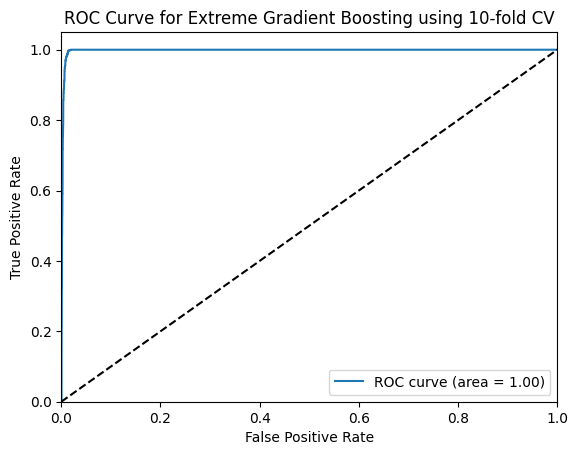


Average accuracy for Logistic Regression using 10-fold CV: 0.7711215152160034
Average sensitivity for Logistic Regression using 10-fold CV: 0.7978293253883805
Average specificity for Logistic Regression using 10-fold CV: 0.7444137050436263
Average ROC AUC for Logistic Regression using 10-fold CV: 0.8515746016152369


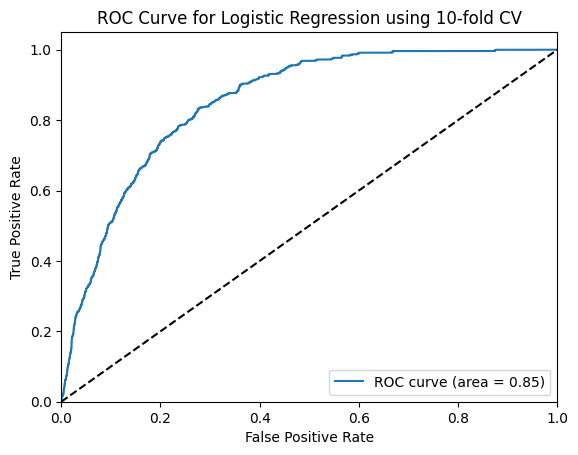


Average accuracy for Random Forest Classifier using 10-fold CV: 0.9896786550329857
Average sensitivity for Random Forest Classifier using 10-fold CV: 1.0
Average specificity for Random Forest Classifier using 10-fold CV: 0.9793573100659715
Average ROC AUC for Random Forest Classifier using 10-fold CV: 1.0


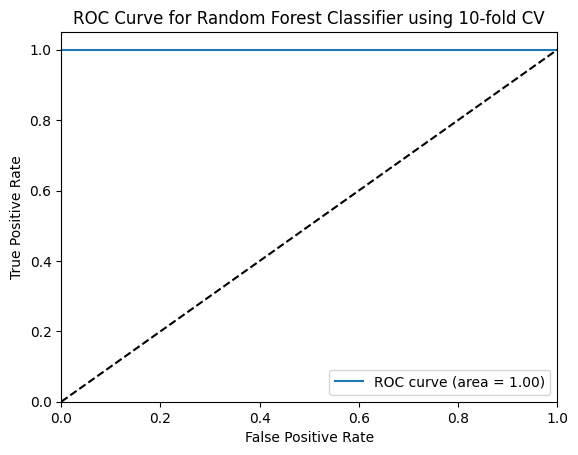


Average accuracy for Decision Tree Classifier using 10-fold CV: 0.9778676314109385
Average sensitivity for Decision Tree Classifier using 10-fold CV: 1.0
Average specificity for Decision Tree Classifier using 10-fold CV: 0.955735262821877
Average ROC AUC for Decision Tree Classifier using 10-fold CV: 0.9778676314109386


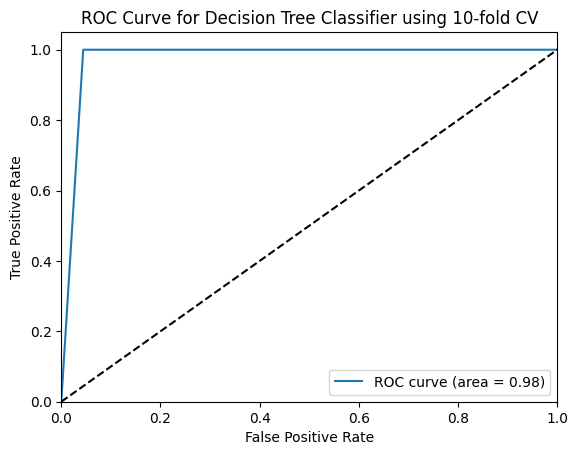

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
print("\nK-Fold Cross-Validation:")
for model_name, model in models.items():
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    y_pred = cross_val_predict(model, X, y, cv=cv)
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    accuracy = accuracy_score(y, y_pred)
    sensitivity = recall_score(y, y_pred)
    specificity = recall_score(y, y_pred, pos_label=0)
    roc_auc = roc_auc_score(y, y_proba)
    fpr, tpr, _ = roc_curve(y, y_proba)

    print(f"\nAverage accuracy for {model_name} using 10-fold CV: {accuracy}")
    print(f"Average sensitivity for {model_name} using 10-fold CV: {sensitivity}")
    print(f"Average specificity for {model_name} using 10-fold CV: {specificity}")
    print(f"Average ROC AUC for {model_name} using 10-fold CV: {roc_auc}")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name} using 10-fold CV')
    plt.legend(loc="lower right")
    plt.show()

Metode terbaik yang dipilih adalah Random Forest